Importing the Dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("loan_prediction_dataset.csv")
df.head()

,Age,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Loan_Purpose,Debt_to_Income_Ratio,Loan_Status
0,50,Salaried,110000,780,35000,72,Debt_Consolidation,0.22,Approved
1,27,Self-Employed,35000,560,20000,48,Debt_Consolidation,0.62,Denied
2,51,Self-Employed,210000,810,80000,120,Business,0.25,Approved
3,20,Student,8000,570,5000,24,Education,0.45,Denied
4,38,Salaried,92000,710,22000,48,Debt_Consolidation,0.29,Approved


Understanding the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3422 non-null   int64  
 1   Employment_Type       3422 non-null   object 
 2   Annual_Income         3422 non-null   int64  
 3   Credit_Score          3422 non-null   int64  
 4   Loan_Amount           3422 non-null   int64  
 5   Loan_Term_Months      3422 non-null   int64  
 6   Loan_Purpose          3422 non-null   object 
 7   Debt_to_Income_Ratio  3422 non-null   float64
 8   Loan_Status           3422 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 240.7+ KB


In [6]:
df.describe()

,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Debt_to_Income_Ratio
count,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000
mean,41.940386,68946.592051,661.469608,29554.432496,56.056108,0.374249
std,13.763780,53168.052114,121.038216,32279.504839,31.435179,0.196908
min,20.000000,0.000000,300.000000,0.000000,12.000000,0.000000
25%,30.000000,15000.000000,600.000000,8000.000000,36.000000,0.220000
50%,41.000000,70000.000000,690.000000,20000.000000,48.000000,0.320000
75%,53.000000,100000.000000,755.000000,40000.000000,72.000000,0.500000
max,70.000000,310000.000000,850.000000,350000.000000,120.000000,0.800000


In [7]:
df.shape

(3422, 9)

Data Preparation

In [9]:
df = df.drop(columns=['Age'])

In [10]:
df.head()

,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Loan_Purpose,Debt_to_Income_Ratio,Loan_Status
0,Salaried,110000,780,35000,72,Debt_Consolidation,0.22,Approved
1,Self-Employed,35000,560,20000,48,Debt_Consolidation,0.62,Denied
2,Self-Employed,210000,810,80000,120,Business,0.25,Approved
3,Student,8000,570,5000,24,Education,0.45,Denied
4,Salaried,92000,710,22000,48,Debt_Consolidation,0.29,Approved


In [11]:
df['Employment_Type'].unique()

array(['Salaried', 'Self-Employed', 'Student', 'Unemployed'], dtype=object)

In [12]:
df['Employment_Type'].value_counts()

Employment_Type
Salaried         1530
Self-Employed     877
Student           543
Unemployed        472
Name: count, dtype: int64

In [13]:
df['Employment_Type']=df['Employment_Type'].map({'Salaried':0,'Self-Employed':1,'Student':2, 'Unemployed':3})

In [14]:
df['Loan_Purpose'].unique()

array(['Debt_Consolidation', 'Business', 'Education', 'Other', 'Medical',
       'Home_Improvement'], dtype=object)

In [15]:
df['Loan_Purpose'].value_counts()

Loan_Purpose
Home_Improvement      690
Other                 647
Debt_Consolidation    587
Business              551
Medical               480
Education             467
Name: count, dtype: int64

In [16]:
df['Loan_Purpose']=df['Loan_Purpose'].map({'Home_Improvement':0,'Other':1,'Debt_Consolidation':2, 'Business':3, 'Medical':4, 'Education':5})

In [17]:
df['Loan_Status'].unique()

array(['Approved', 'Denied'], dtype=object)

In [18]:
df['Loan_Status'].value_counts()

Loan_Status
Approved    2053
Denied      1369
Name: count, dtype: int64

In [19]:
df['Loan_Status']=df['Loan_Status'].map({'Denied':0,'Approved':1})

In [20]:
df.head()

,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Loan_Purpose,Debt_to_Income_Ratio,Loan_Status
0,0,110000,780,35000,72,2,0.22,1
1,1,35000,560,20000,48,2,0.62,0
2,1,210000,810,80000,120,3,0.25,1
3,2,8000,570,5000,24,5,0.45,0
4,0,92000,710,22000,48,2,0.29,1


In [21]:
df.isnull().sum()

Employment_Type         0
Annual_Income           0
Credit_Score            0
Loan_Amount             0
Loan_Term_Months        0
Loan_Purpose            0
Debt_to_Income_Ratio    0
Loan_Status             0
dtype: int64

In [22]:
df.dropna()
df.head()

,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Loan_Purpose,Debt_to_Income_Ratio,Loan_Status
0,0,110000,780,35000,72,2,0.22,1
1,1,35000,560,20000,48,2,0.62,0
2,1,210000,810,80000,120,3,0.25,1
3,2,8000,570,5000,24,5,0.45,0
4,0,92000,710,22000,48,2,0.29,1


Splitting the Dataset into Train and Test sets

In [24]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Selecting Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=1000)

#Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

Training the Models

In [31]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Testing the Models

In [36]:
#Logistic Regression
y_train_lr = lr_model.predict(X_train)

#Decision Tree Classifier
y_train_dt = dt_model.predict(X_train)

#Random Forest Classifier
y_train_rf = rf_model.predict(X_train)

Evaluating the Models

In [35]:
#Logistic Regression
y_pred_lr = lr_model.predict(X_test)

#Decision Tree Classifier
y_pred_dt = dt_model.predict(X_test)

#Random Forest Classifier
y_pred_rf = rf_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [39]:
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, y_train_lr))
print("Decision Tree Train Accuracy:", accuracy_score(y_train, y_train_dt))
print("Random Forest Train Accuracy:", accuracy_score(y_train, y_train_rf))

Logistic Regression Train Accuracy: 0.9227557411273486
Decision Tree Train Accuracy: 1.0
Random Forest Train Accuracy: 1.0


In [40]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.928919182083739
Decision Tree Accuracy: 0.9328140214216164
Random Forest Accuracy: 0.9513145082765336


In [41]:
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))

Logistic Regression Precision: 0.939935064935065
Decision Tree Precision: 0.946078431372549
Random Forest Precision: 0.959349593495935


In [42]:
print("Logistic Regression F1 score:", f1_score(y_test, y_pred_lr))
print("Decision Tree F1 score:", f1_score(y_test, y_pred_dt))
print("Random Forest F1 score:", f1_score(y_test, y_pred_rf))

Logistic Regression F1 score: 0.9406986190089358
Decision Tree F1 score: 0.9437652811735942
Random Forest F1 score: 0.959349593495935


In [43]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

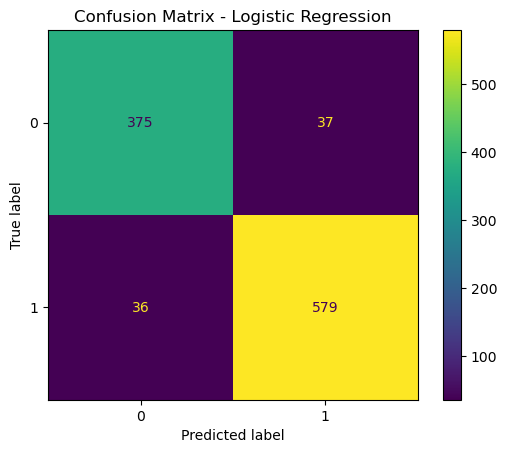

In [45]:
ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

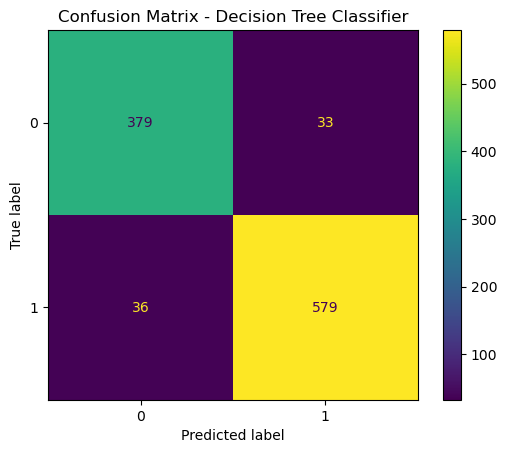

In [46]:
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

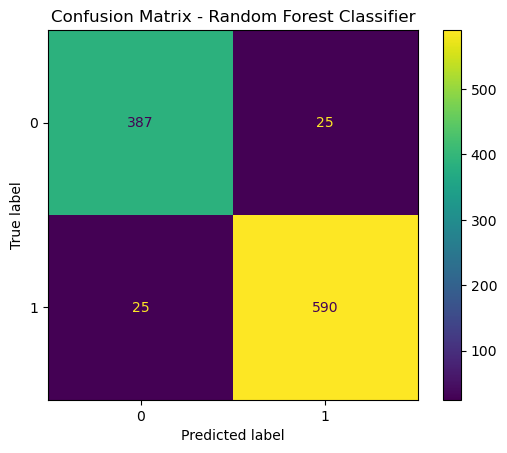

In [47]:
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

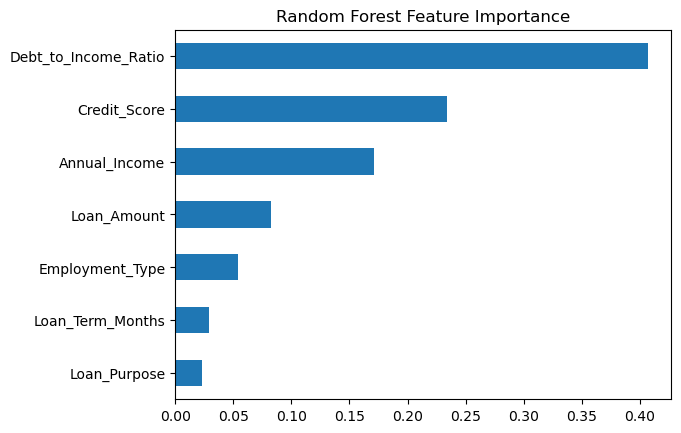

In [48]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

Testing for New Values

In [50]:
new_applicant = pd.DataFrame({
    'Employment_Type': [1],
    'Annual_Income': [50000],
    'Credit_Score': [750],
    'Loan_Amount': [20000],
    'Loan_Term_Months': [60],
    'Loan_Purpose': [1],
    'Debt_to_Income_Ratio': [0.25]
})

In [51]:
#Logistic Regression
lr_pred = lr_model.predict(new_applicant)
print("Logistic Regression Prediction:", "Approved" if lr_pred[0]==1 else "Rejected")

#Decision Tree Classifier
dt_pred = dt_model.predict(new_applicant)
print("Decision Tree Prediction:", "Approved" if dt_pred[0]==1 else "Rejected")

#Random Forest Classifier
rf_pred = rf_model.predict(new_applicant)
print("Random Forest Prediction:", "Approved" if rf_pred[0]==1 else "Rejected")

Logistic Regression Prediction: Approved
Decision Tree Prediction: Approved
Random Forest Prediction: Approved
